In [1]:
#Using keras and sklearn for random forest and neural network
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib
from scipy.signal import *
from scipy.ndimage.filters import gaussian_filter1d as gfilter

import pandas as pd
from pandas.plotting import lag_plot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tnrange, tqdm_notebook

import sqlite3
import math
import json
import datetime
import calendar
import os

import pylab
import matplotlib.colors as colors
import matplotlib.cm as cm

%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; } .CodeMirror pre {font-size: 9pt;}</style>"))

/Users/chibuk/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.


In [2]:
#generate the sqlite table and name it from your raw data csv collected from your exchange

table_name = "ETHCAD"
conn = sqlite3.connect('pair_history_ethcad.db')

df = pd.read_csv('20180124ethcad0730.csv')
df.to_sql(table_name, conn, if_exists='append', index=False)

conn.close()

In [3]:
#pass the table to a dataframe

conn = sqlite3.connect('pair_history_ethcad.db')
cursor = conn.cursor()

TARGET = table_name
ETHCAD = pd.read_sql_query('SELECT * FROM ' + TARGET , conn)

#print(ETHCAD)

In [4]:
ETHCAD.columns

Index([u'w', u'h', u'm', u'ask', u'bid', u'spread', u'volume'], dtype='object')

/Users/chibuk/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


,w,h,m,ask,bid,spread,volume,diffask,diffbid,diffvolume,class
1,2,23,32,0.000008,-0.000016,16.20,0.029360,0.00,3.97,-1.304900,1
2,2,23,33,0.000000,-0.003151,12.23,0.000396,0.00,0.00,-1.415027,1
3,2,23,34,0.000000,0.000000,12.23,0.000430,-0.23,-4.00,-1.873849,1
4,2,23,35,0.000185,0.003185,16.00,0.000569,-0.81,-8.97,-35.017690,1
5,2,23,36,0.000651,0.007119,24.16,0.010621,-0.01,0.18,16.030270,1
6,2,23,37,0.000008,-0.000142,23.97,-0.004811,0.02,0.09,7.038194,0
7,2,23,38,-0.000016,-0.000071,23.90,-0.002122,-0.03,0.70,1.263706,1
8,2,23,39,0.000024,-0.000552,23.17,-0.000382,-0.18,1.00,1.664624,1
9,2,23,40,0.000145,-0.000789,21.99,-0.000503,0.00,4.01,-0.230758,1
10,2,23,41,0.000000,-0.003165,17.98,0.000070,0.00,3.00,3.090941,1


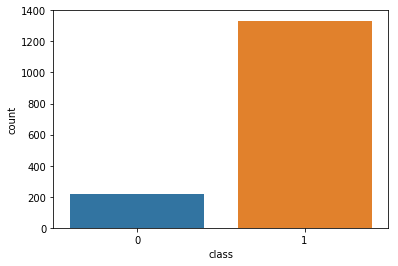

In [5]:
import numpy as np

ETHCAD['diffask'] = ETHCAD['ask'] - ETHCAD['ask'].shift(-1)
ETHCAD['diffbid'] = ETHCAD['bid'] - ETHCAD['bid'].shift(-1)
ETHCAD['diffvolume'] = ETHCAD['volume'] - ETHCAD['volume'].shift(-1)

ETHCAD['bid'] = ETHCAD['bid'].pct_change()
ETHCAD['ask'] = ETHCAD['ask'].pct_change()
ETHCAD['volume'] = ETHCAD['volume'].pct_change()

#0 = buy, 1 = pass
def label_signal(diff):
        if (diff > 0):
            return '0'
        elif (diff < 0):
            return '1'
        return '1'
ETHCAD['class'] = ETHCAD['diffask'].map(lambda x: label_signal(x))
ETHCAD.dropna(inplace=True)
ETHCAD = ETHCAD[~(ETHCAD['class'] == 'neutral')]
sns.countplot(x='class', data=ETHCAD)

ETHCAD

#TODO come up with a method to properly balance the dataframe between BUY and PASS classifications

In [7]:
from keras.utils import np_utils

X = ETHCAD.drop(['class','diffask','diffbid','diffvolume'], axis=1).values
X = X.astype('float32')

Y = ETHCAD['class'].values

encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
Y = np_utils.to_categorical(encoded_Y)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

train_size = int(len(X) * 0.8)
test_size = len(X) - train_size

trainX = X[:train_size]
trainY = Y[:train_size]
trainEncodedY = encoded_Y[:train_size]
testX = X[train_size:]
testY = Y[train_size:]
testEncodedY = encoded_Y[train_size:]
trainX.shape, testX.shape, encoded_Y.shape, testEncodedY.shape

((1241, 7), (311, 7), (1552,), (311,))

/Users/chibuk/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


('accuracy :', 1.0)


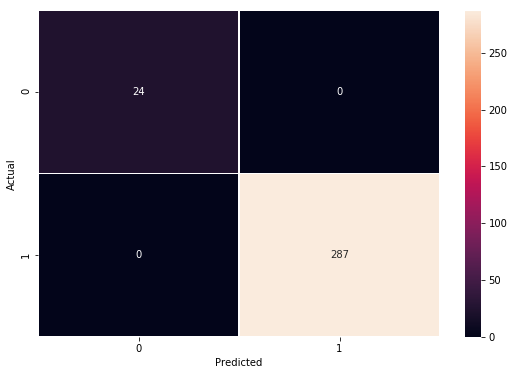

In [9]:
#giving some unrealistic prediction results

from numpy import argmax

clf = RandomForestClassifier(n_estimators=50, n_jobs=2)
clf = clf.fit(trainX, trainY)
preds = clf.predict(testX)
preds = preds.argmax(1)
preds = encoder.inverse_transform(preds)
confm = pd.crosstab(testEncodedY, preds, rownames=['Actual'], colnames=['Predicted'])
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(confm, annot=True, fmt="d", linewidths=.5, ax=ax)
print("accuracy :", clf.score(testX, testY))

In [10]:
#KERA neural net prediction model

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input, LSTM, Dense, merge, Flatten
from keras.layers.convolutional import Convolution1D, MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.models import load_model

from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn import datasets, metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tnrange, tqdm_notebook

import math
import json
import datetime
import calendar
import os

%matplotlib inline

In [11]:
trainX.shape

(1241, 7)

In [12]:
#define the model paramaters based on inputs, layers and outputs

def baseline_model():
    model = Sequential()
    model.add(Dense(7, input_dim=7))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(2, activation='relu'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'categorical_accuracy'])
    return model

In [13]:
model = baseline_model()

encodedY = np_utils.to_categorical(encoded_Y)

In [14]:


from keras.callbacks import ModelCheckpoint

model.summary()

filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 64        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 18        
Total params: 138
Trainable params: 138
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(trainX, encodedY[:train_size], epochs=20, batch_size=300, verbose=2, shuffle=True, validation_split=0.2, callbacks=callbacks_list)

Train on 992 samples, validate on 249 samples
Epoch 1/20

Epoch 00001: val_categorical_accuracy improved from -inf to 0.24498, saving model to weights.best.hdf5
 - 0s - loss: 0.7331 - acc: 0.1885 - categorical_accuracy: 0.1885 - val_loss: 0.7176 - val_acc: 0.2450 - val_categorical_accuracy: 0.2450
Epoch 2/20

Epoch 00002: val_categorical_accuracy improved from 0.24498 to 0.50201, saving model to weights.best.hdf5
 - 0s - loss: 0.7079 - acc: 0.3165 - categorical_accuracy: 0.3165 - val_loss: 0.6962 - val_acc: 0.5020 - val_categorical_accuracy: 0.5020
Epoch 3/20

Epoch 00003: val_categorical_accuracy improved from 0.50201 to 0.70281, saving model to weights.best.hdf5
 - 0s - loss: 0.6877 - acc: 0.6331 - categorical_accuracy: 0.6331 - val_loss: 0.6789 - val_acc: 0.7028 - val_categorical_accuracy: 0.7028
Epoch 4/20

Epoch 00004: val_categorical_accuracy improved from 0.70281 to 0.82329, saving model to weights.best.hdf5
 - 0s - loss: 0.6708 - acc: 0.8085 - categorical_accuracy: 0.8085 - val

In [16]:
# X = [w,h,m,ask,bid,spread,volume,diffbid,diffvolume]
X = [[2,15,41,1245.0,1240.01,4.990000000000009,4670.02846038]]
X = scaler.inverse_transform(X)
X

array([[   4.        ,  344.99999357, 2418.99999549,   43.58912428,
          36.48610882,  132.14519523, 2420.00263837]])

In [17]:
#print prediction model

model.predict_classes(X)

array([1])

In [18]:
#save and load scaler for live trader
joblib.dump(scaler, './' + TARGET + '_open_X_scaler_3.0.0.pkl') 

scaler    = joblib.load('./' + TARGET + '_open_X_scaler_3.0.0.pkl')

In [19]:
#loading model and weights for live prediciton for experimenting notebook
model = baseline_model()

model.load_weights("weights.best.hdf5")

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 64        
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 18        
Total params: 138
Trainable params: 138
Non-trainable params: 0
_________________________________________________________________
